In [1]:
import tensorflow as tf
import numpy as np
import pickle
import matplotlib.pyplot as plt
import timeit
from HW2_4b_load import *
import time

<h1>Load training, validation, testing set from your preprocessed files</h1>

In [2]:
validation_data, validation_labels = load_validation_batch()

<h1>Define hyperparameter</h1>

In [3]:
lr = 0.0001
batch_size = 64
num_epochs = 10
num_classes = 2

<h1>Placeholder</h1>

In [4]:
tf.reset_default_graph()
X = tf.placeholder(tf.float32,[None,227,227,3],name='X')
Y = tf.placeholder(tf.int32,[None,num_classes],name='Y')

<h1>AlexNet</h1>

In [5]:
C1 = tf.layers.conv2d(X, filters=96, kernel_size=11, strides=4, activation=tf.nn.relu)

S2 = tf.layers.max_pooling2d(C1, pool_size=3, strides=2)

S2_bn = tf.layers.batch_normalization(S2)

S2_bp = tf.pad(S2_bn, tf.constant([[0,0], [2,2], [2,2], [0,0]]))

C3 = tf.layers.conv2d(S2_bp, filters=256, kernel_size=5, strides=1, activation=tf.nn.relu)

S4 = tf.layers.max_pooling2d(C3, pool_size=3, strides=2)

S4_bn = tf.layers.batch_normalization(S4)

S4_bp = tf.pad(S4_bn, tf.constant([[0,0], [1,1], [1,1], [0,0]]))

C5 = tf.layers.conv2d(S4_bp, filters=384, kernel_size=3, strides=1, activation=tf.nn.relu)

C5 = tf.pad(C5, tf.constant([[0,0], [1,1], [1,1], [0,0]]))

C6 = tf.layers.conv2d(C5, filters=384, kernel_size=3, strides=1, activation=tf.nn.relu)

C6 = tf.pad(C6, tf.constant([[0,0], [1,1], [1,1], [0,0]]))

C7 = tf.layers.conv2d(C6, filters=256, kernel_size=3, strides=1,activation=tf.nn.relu)

S8 = tf.layers.average_pooling2d(C7, pool_size=3, strides=2)

S8_bn = tf.layers.batch_normalization(S8)

C9 = tf.layers.conv2d(S8_bn, filters=4096, kernel_size=6, strides=1, activation=tf.nn.relu)

F10 = tf.layers.dense(tf.layers.flatten(C9), units=4096, activation=tf.nn.relu)

F11 = tf.layers.dense(F10, units=4096, activation=tf.nn.relu)

logits = tf.layers.dense(F11, units=2)

Instructions for updating:
Use keras.layers.conv2d instead.
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use keras.layers.max_pooling2d instead.
Instructions for updating:
Use keras.layers.batch_normalization instead.
Instructions for updating:
Use keras.layers.average_pooling2d instead.
Instructions for updating:
Use keras.layers.flatten instead.
Instructions for updating:
Use keras.layers.dense instead.


<h1>Cost and Optimization</h1>

In [6]:
# define loss
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits,labels=Y),name='loss')

# define optimizer
optimizer = tf.train.AdamOptimizer(learning_rate=lr)
train_op = optimizer.minimize(loss)

# compare the predicted labels with true labels
correct_pred = tf.equal(tf.argmax(tf.nn.softmax(logits),1),tf.argmax(Y,1))

# compute the accuracy by taking average
accuracy = tf.reduce_mean(tf.cast(correct_pred,tf.float32),name='accuracy')

<h1>Training and validation</h1>
<h2>Train your model only 10 epochs</h2>
<p style="font-size:20px">1. Print out training accuracy and validation accuracy each training epoch</p>
<p style="font-size:20px">2. Print out training time each training epoch</p>
<p style="font-size:20px">3. Your goal is to reach 85% validation accuracy in 10 training epochs. If you reach that, you can perform testing, print out your test accuracy. Plot out the ten images with title that contains the probability of the labeled class.</p>

In [7]:
init = tf.global_variables_initializer()
saver = tf.train.Saver()
with tf.Session() as sess:
    sess.run(init)
    for i in range(num_epochs):
        s = time.time()
        batch_id = 0
        while batch_id < 10:
            training_data = load_training_batch(batch_id, batch_size)
            for data, labels in training_data:
                sess.run(train_op, feed_dict = {X: data, Y: labels})
                training_acc = sess.run(accuracy, feed_dict = {X: data, Y: labels})
            batch_id = batch_id + 1
        val_acc = sess.run(accuracy, feed_dict = {X: validation_data, Y: validation_labels})
        f = time.time()
        print('Epoch:' + str(i) + '   Time:{:.3f}'.format(f - s) + '   Training accuracy:{:.3f}'.format(training_acc) + '   Validation accuracy:{:.3f}'.format(val_acc))
    save_path = saver.save(sess, 'model.ckpt')

Epoch:0   Time:138.098   Training accuracy:0.688   Validation accuracy:0.676
Epoch:1   Time:133.657   Training accuracy:0.750   Validation accuracy:0.774
Epoch:2   Time:134.054   Training accuracy:0.828   Validation accuracy:0.822
Epoch:3   Time:134.304   Training accuracy:0.922   Validation accuracy:0.846
Epoch:4   Time:134.587   Training accuracy:0.875   Validation accuracy:0.858
Epoch:5   Time:136.088   Training accuracy:0.906   Validation accuracy:0.882
Epoch:6   Time:134.226   Training accuracy:0.922   Validation accuracy:0.860
Epoch:7   Time:133.762   Training accuracy:0.953   Validation accuracy:0.874
Epoch:8   Time:135.113   Training accuracy:0.953   Validation accuracy:0.884
Epoch:9   Time:133.725   Training accuracy:0.969   Validation accuracy:0.870


Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from model.ckpt


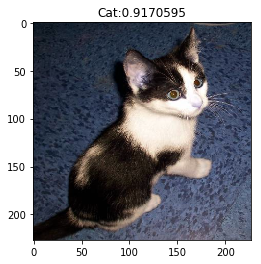

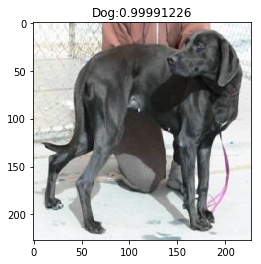

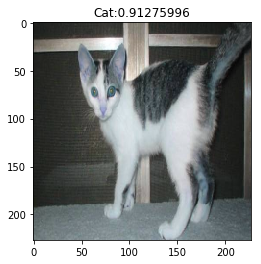

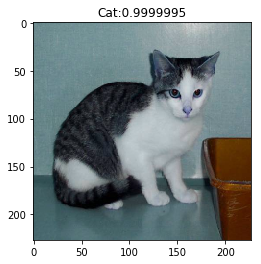

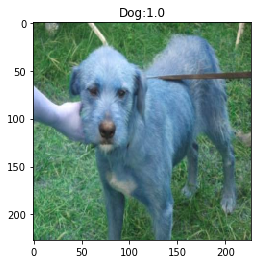

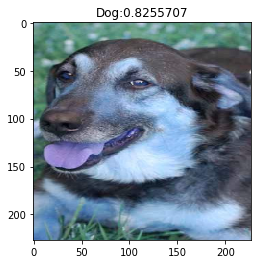

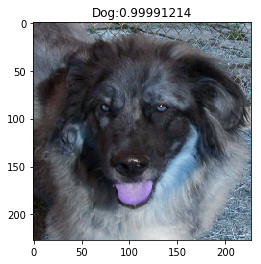

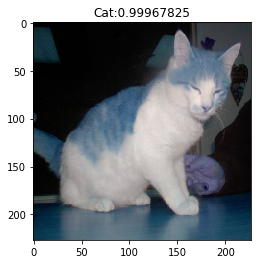

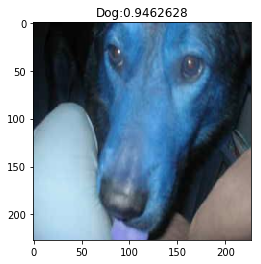

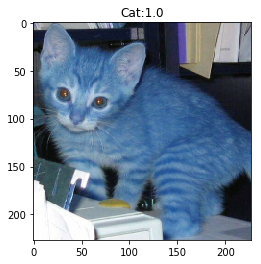

In [8]:
with tf.Session() as sess:
    saver.restore(sess, "model.ckpt")
    test_data = load_test_batch(0)
    P = sess.run(tf.nn.softmax(logits), feed_dict = {X: test_data[:10]})
    # P = np.squeeze(P)
    for i in range(10):
        result = 'Cat:' + str(P[i][0])
        if (P[i][1] > P[i][0]):
            result = 'Dog:' + str(P[i][1])
        fig = plt.figure()
        plt.imshow(np.squeeze(test_data[i]))
        plt.title(result)